<a href="https://colab.research.google.com/github/ruby-hsiao/AI_Web/blob/main/Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# White Balance

import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

img =  cv2.imread("snow_como.jpg")
img2 = img.copy()

RGBavg = img[:,:,0].mean()+img[:,:,1].mean()+img[:,:,2].mean()
Bavg = RGBavg/(img[:,:,0].mean()*3)
Gavg = RGBavg/(img[:,:,1].mean()*3)
Ravg = RGBavg/(img[:,:,2].mean()*3)

img2[:,:,0] = cv2.multiply(img[:,:,0], Bavg)
img2[:,:,1] = cv2.multiply(img[:,:,1], Gavg)
img2[:,:,2] = cv2.multiply(img[:,:,2], Ravg)

print("bef")
cv2_imshow(img)

print("aft")
cv2_imshow(img2)

127.0
bef


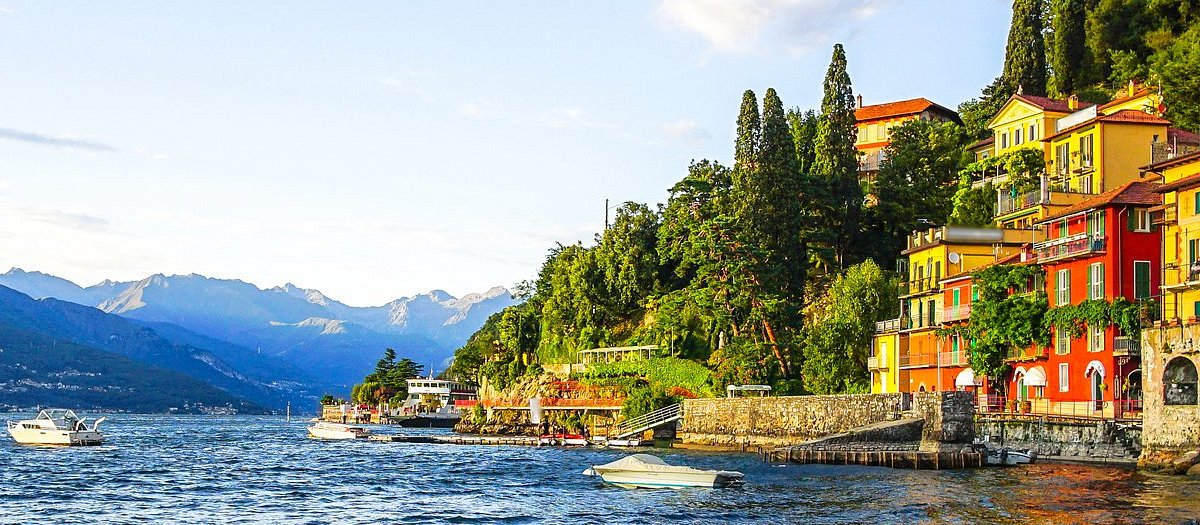

aft


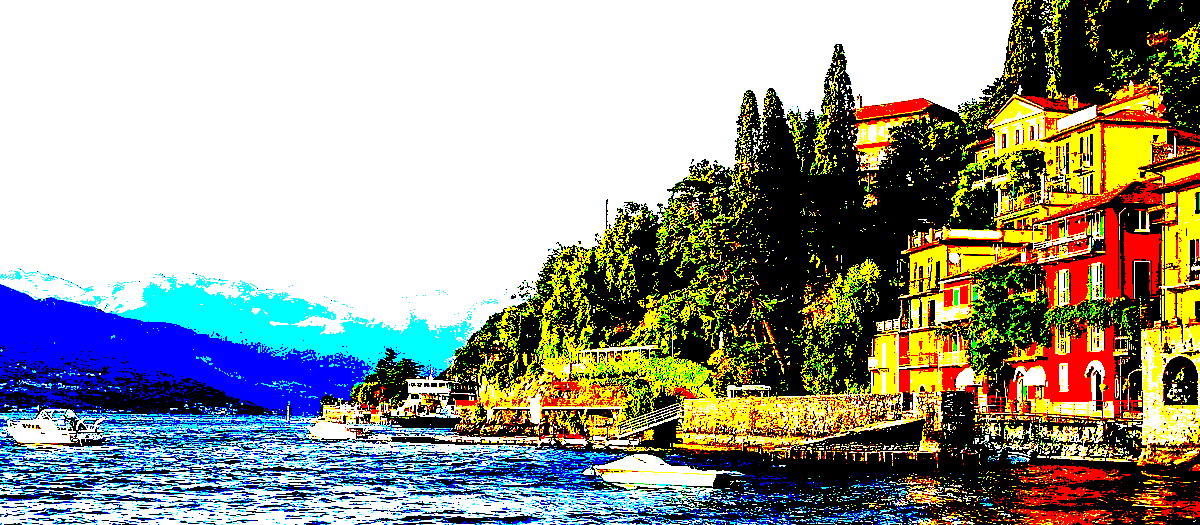

In [10]:
# 影像二值化/切一刀分兩半

import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

img =  cv2.imread("lake-como.jpg")

th, img2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(th)

print("bef")
cv2_imshow(img)

print("aft")
cv2_imshow(img2)

140.0
154.0
145.0
bef


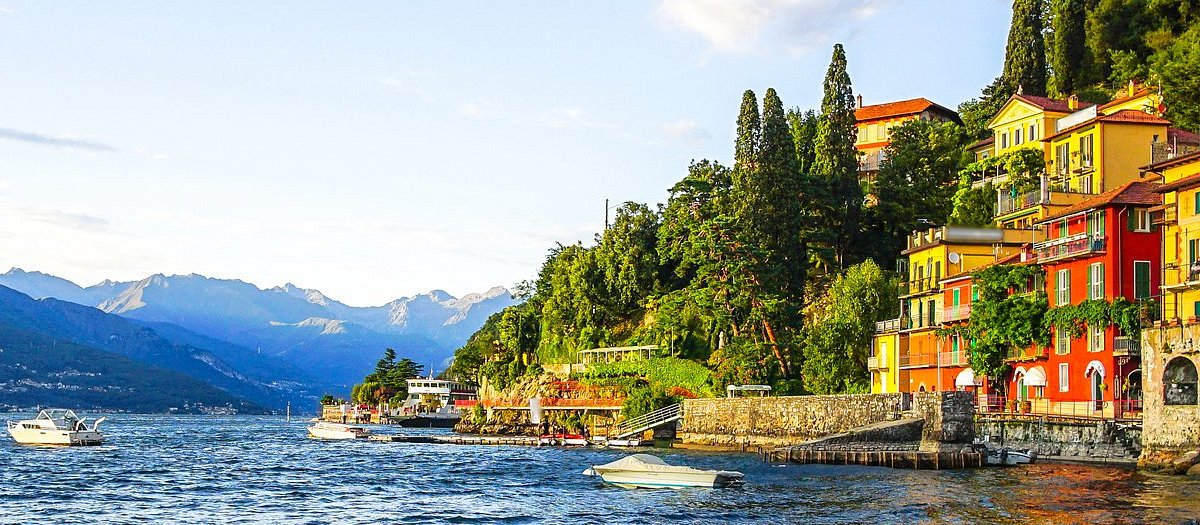

adaptiveThreshold


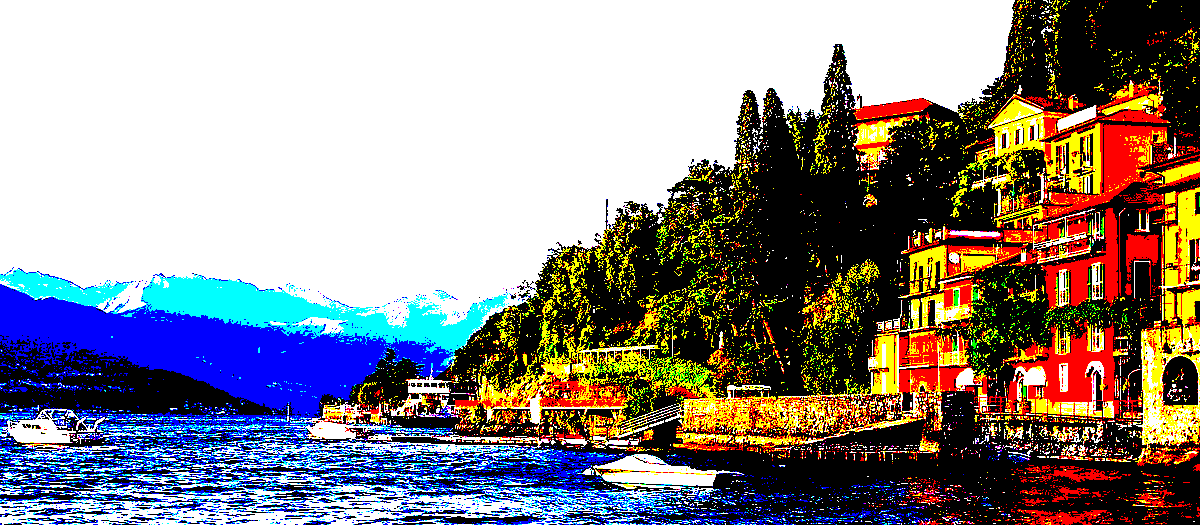

In [16]:
# 影像二值化/自動計算門檻值，只接受單一顏色通道，每顏色各自處理

import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

img =  cv2.imread("lake-como.jpg",1)
img2 = img.copy()

th, img2[:,:,0] = cv2.threshold(img[:,:,0], 200, 255, cv2.THRESH_OTSU)
print(th)
th, img2[:,:,1] = cv2.threshold(img[:,:,1], 200, 255, cv2.THRESH_OTSU)
print(th)
th, img2[:,:,2] = cv2.threshold(img[:,:,2], 200, 255, cv2.THRESH_OTSU)
print(th)

print("bef")
cv2_imshow(img)

print("auto Threshold")
cv2_imshow(img2)

127.0
bef


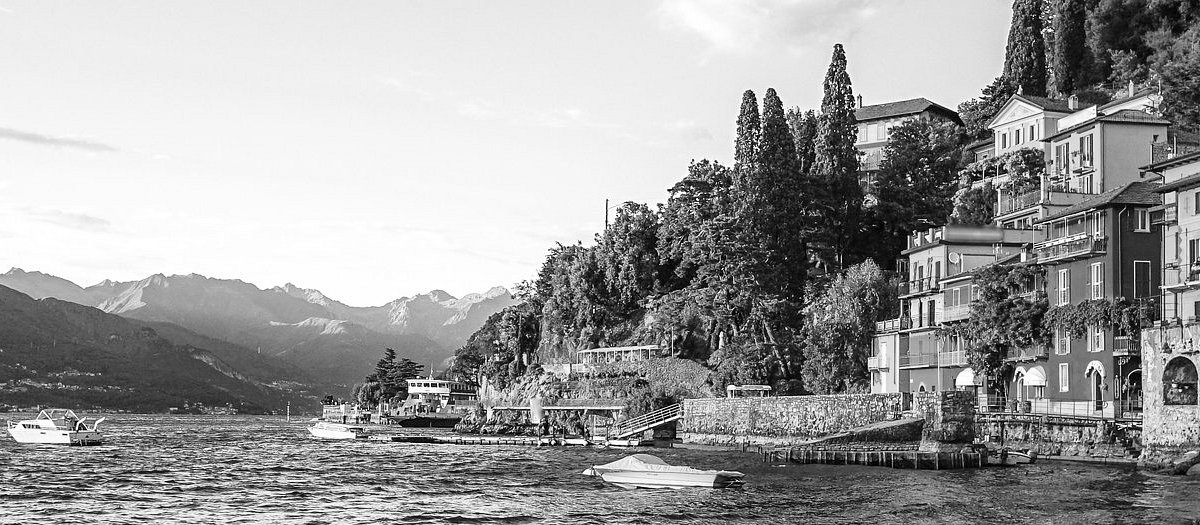

adaptiveThreshold


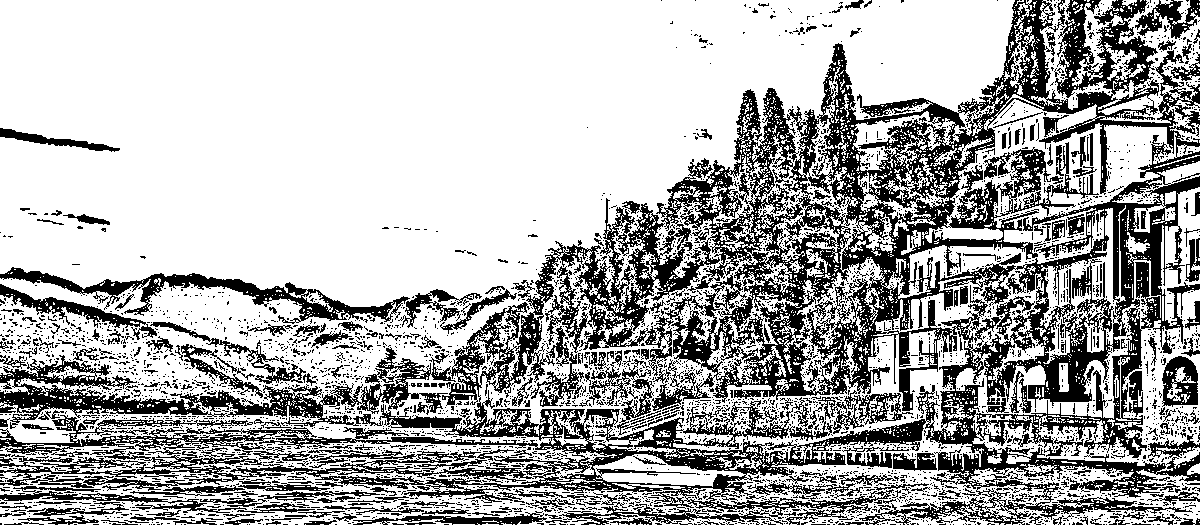

In [15]:
# 影像二值化/數個區塊計算門檻值，只接受單一顏色通道，每顏色各自處理

import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

img =  cv2.imread("lake-como.jpg",0) #gray
img2 = img.copy()

img2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,45, 5) #區塊大小:45 越大圖形越明顯, 必為單數!
print(th)

print("bef")
cv2_imshow(img)

print("adaptiveThreshold")
cv2_imshow(img2)

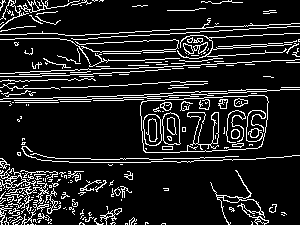

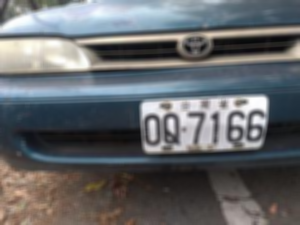

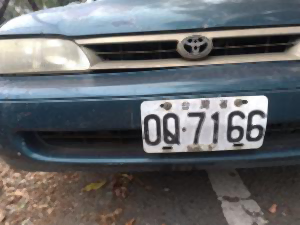

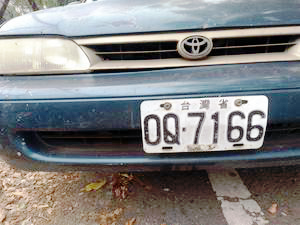

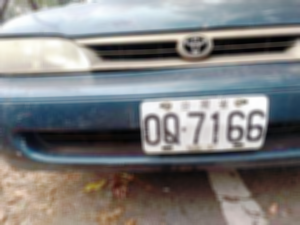

In [29]:
# 邊緣檢測

import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

img =  cv2.imread("car_num.jpg",1)
img2 = img.copy()

img2 = cv2.Canny(img, 100, 200)

cv2_imshow(img2)

# 平均值模糊化: 霧化效果，形還在
img3 = img.copy()

img3 = cv2.blur(img3, (5,5))
cv2_imshow(img3)

# 中值模糊化: 融化效果，需單數，數值越大效果越糊
img4 = img.copy()

img4 = cv2.medianBlur(img4, 3)
cv2_imshow(img4)

# 銳利化: 清晰度加強, 需單色處理
img5 = img.copy()

img5[:,:,0] = cv2.equalizeHist(img[:,:,0])
img5[:,:,1] = cv2.equalizeHist(img[:,:,1])
img5[:,:,2] = cv2.equalizeHist(img[:,:,2])
cv2_imshow(img5)


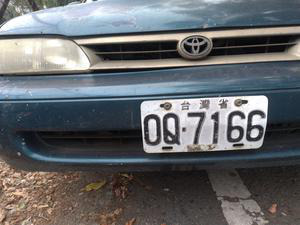

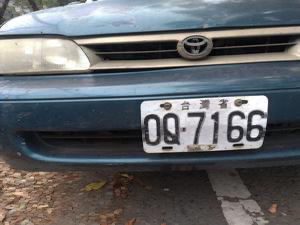

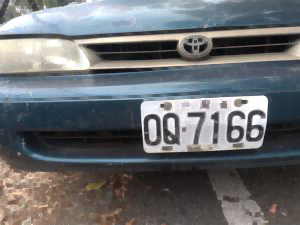

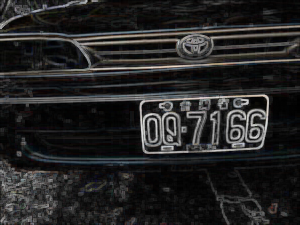

In [42]:
# 形態學 / 矩陣越大

import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

img =  cv2.imread("car_num.jpg",1)
img2 = img.copy()
cv2_imshow(img)
'''
# 侵蝕: 深色變明顯
img2 = cv2.erode(img, np.ones((3,3)))
cv2_imshow(img2)

# 膨脹: 白色變明顯
img3 = cv2.dilate(img, np.ones((5,5)))
cv2_imshow(img3)
'''

# 侵蝕+膨脹: 可除雜訊
img4 = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((3,3)))
cv2_imshow(img4)
img5 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((3,3)))
cv2_imshow(img5)
img6 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, np.ones((3,3)))
cv2_imshow(img6)
